In [1]:
import pandas as pd
import numpy as np

In [2]:
df_file = 'rpi_data_compact.csv'
df_compact = pd.read_csv(df_file)

In [44]:
df_compact.head()
df_compact.shape

(680, 6)

In [9]:
df_compact2 = df_compact.drop('Unnamed: 0',axis=1)
df_compact2.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [10]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [11]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Unnamed: 0           0
Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
dtype: int64

In [12]:
NaNs_total = NaNs_per_column.sum()
print(NaNs_total)

23


In [13]:
df_compact.isnull().sum().sum()

23

In [18]:
porcentaje = (23*100)/679
print(np.round(porcentaje, 2))


3.39


In [45]:
df_compact_clean = df_compact2.dropna()
df_compact_clean.head()
df_compact_clean.shape

(673, 5)

In [21]:
df_compact_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [24]:
df_compact_clean['Ping (ms)']=pd.to_numeric(df_compact_clean['Ping (ms)'])
df_compact_clean['Upload (Mbit/s)']=pd.to_numeric(df_compact_clean['Upload (Mbit/s)'])
df_compact_clean['Download (Mbit/s)']=pd.to_numeric(df_compact_clean['Download (Mbit/s)'])
df_compact_clean.dtypes

<ipython-input-24-ba48818f40dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean['Ping (ms)']=pd.to_numeric(df_compact_clean['Ping (ms)'])
<ipython-input-24-ba48818f40dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compact_clean['Upload (Mbit/s)']=pd.to_numeric(df_compact_clean['Upload (Mbit/s)'])
<ipython-input-24-ba48818f40dd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [25]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [26]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date','Time','Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)'])

In [27]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [28]:
df_compact_clean.to_csv('./rpi_data_processed.csv', index = False)
df_clean = df_compact_clean

In [29]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [32]:
means =df_clean.mean()
stands =df_clean.std()
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

<ipython-input-32-7888ffa7f7f4>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means =df_clean.mean()
<ipython-input-32-7888ffa7f7f4>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stands =df_clean.std()


In [34]:
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()
argmin_ping = df_clean['Download (Mbit/s)'].argmin()
argmax_ping = df_clean['Download (Mbit/s)'].argmax()
argmin_ping = df_clean['Upload (Mbit/s)'].argmin()
argmax_ping = df_clean['Upload (Mbit/s)'].argmax()

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

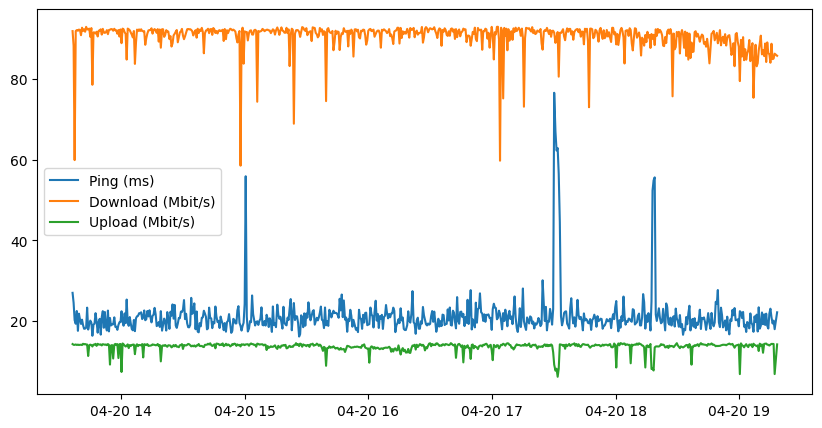

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
t = pd.to_datetime(df_clean['Time'])
ax.plot(t, df_clean['Ping (ms)'], label = 'Ping (ms)')
ax.plot(t, df_clean['Download (Mbit/s)'], label = 'Download (Mbit/s)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label = 'Upload (Mbit/s)')
ax.legend()
plt.show ()